In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

random.seed(12)

In [2]:
def width2var(w):
    var = (w/2)**2
    return var

In [3]:
# 1. medium area
mean_1 = (120, 500, 25)
cov_1 = [[width2var(80), 0, 0], [0, width2var(200), 0], [0, 0, 5]]
data_1 = np.random.multivariate_normal(mean_1, cov_1, (8))
data_1 = data_1.clip(0, 1290)
col_1 = 'black'

# 2. expensive area (innenstadt)
mean_2 = (500, 500, 35)
cov_2 = [[width2var(100), 0, 0], [0, width2var(100), 0], [0, 0, 5]]
data_2 = np.random.multivariate_normal(mean_2, cov_2, (15))
data_2 = data_2.clip(0, 1290)
col_2 = 'blue'

# 5. cheap area 
mean_5 = (400, 200, 22)
cov_5 = [[width2var(50), 0, 0], [0, width2var(50), 0], [0, 0, 5]]
data_5 = np.random.multivariate_normal(mean_5, cov_5, (15))
data_5 = data_5.clip(0, 1290)
col_5 = 'darkgreen'

# 6. really cheap area
mean_6 = (150, 150, 15)
cov_6 = [[width2var(100), 0, 0], [0, width2var(80), 0], [0, 0, 5]]
data_6 = np.random.multivariate_normal(mean_6, cov_6, (15))
data_6 = data_6.clip(0, 1290)
col_6 = 'orange'


In [4]:
data = np.concatenate((data_1, data_2, data_5, data_6))
locs = np.c_[data.T[0], data.T[1]]
rents = data.T[2]
print(locs)
print(rents)

[[ 62.75548813 397.15759126]
 [ 58.29427891 249.20893924]
 [121.61060694 597.98246765]
 [171.44741239 616.99116721]
 [143.87084578 544.50449565]
 [ 79.89786983 403.00213508]
 [ 97.22240273 538.54470168]
 [ 86.44950442 302.24087406]
 [420.30371668 495.82901871]
 [552.64254738 496.20472442]
 [583.77366902 482.20230997]
 [536.74165118 427.05226439]
 [591.39433748 507.49682099]
 [543.68948647 520.02429649]
 [488.46613497 524.60189532]
 [479.34051196 516.57390265]
 [524.48862366 515.20716893]
 [476.70596762 605.3422317 ]
 [473.56013996 445.97703312]
 [522.48716939 530.22085391]
 [436.30489823 495.93660982]
 [497.27730897 493.7661105 ]
 [471.01693584 491.60469812]
 [398.2881063  151.85737167]
 [402.1445974  243.25613942]
 [399.75704739 199.18857718]
 [390.70953113 218.65053982]
 [426.85586631 185.31203878]
 [430.91038552 204.90805475]
 [396.44739998 166.71074973]
 [437.33449427 209.44706604]
 [447.02305471 220.80976968]
 [376.97528514 197.79588264]
 [395.11852435 236.48444498]
 [409.20816259

(874, 620, 3)


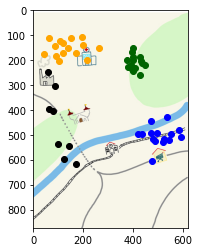

In [5]:
img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()
ax.imshow(img)
ax.scatter(data_1.T[0], data_1.T[1], color=col_1)
ax.scatter(data_2.T[0], data_2.T[1], color=col_2)
ax.scatter(data_5.T[0], data_5.T[1], color=col_5)
ax.scatter(data_6.T[0], data_6.T[1], color=col_6)

print(img.shape)


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

#Fit a DecisionTree with depth 1 to the data
model = DecisionTreeRegressor(random_state=0, max_depth=2, min_samples_leaf=5)
model.fit(locs,rents)

#Create test data points and calculate prediction
locs_x_test = np.linspace(0, 1300, 100)
locs_y_test = np.linspace(0, 842, 65)
locs_test = np.array(np.meshgrid(locs_x_test, locs_y_test)).T.reshape(-1,2)
rents_pred = model.predict(locs_test)

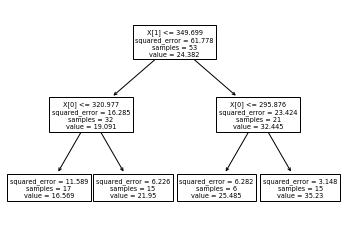

In [7]:
tree.plot_tree(model)
None

In [10]:
import TreeToReact as ttr
import json
dict = ttr.export_for_react(model, img)
for i in dict.values():
  print(type(i))
print(dict)
json_object = json.dumps(dict, indent = 4) 
with open('aiPythonTree.json', 'w') as f:
    json.dump(json_object, f)




<class 'int'>
<class 'int'>
<class 'int'>
<class 'list'>
{'avgRent': 24, 'feature': 1, 'threshold': 40, 'children': [{'avgRent': 19, 'feature': 0, 'threshold': 52, 'children': [{'avgRent': 17, 'feature': -1, 'threshold': -1}, {'avgRent': 22, 'feature': -1, 'threshold': -1}]}, {'avgRent': 32, 'feature': 0, 'threshold': 48, 'children': [{'avgRent': 25, 'feature': -1, 'threshold': -1}, {'avgRent': 35, 'feature': -1, 'threshold': -1}]}]}


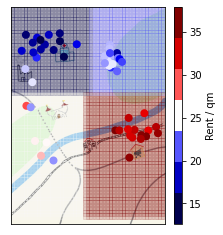

In [9]:
import matplotlib

img = plt.imread("../assets/map_prototype.jpg")
fig, ax  = plt.subplots()

# On my desktop, DPI gets scaled by 0.75
#fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#Plot prediction of Decision tree
#old colormap: tab20b
cmap1 = 'seismic'
cmap2 = plt.get_cmap('seismic', 7)
ax.scatter(locs_test[:,0], locs_test[:,1], marker=",", c= rents_pred, cmap = cmap2, alpha = 0.1)

#Plot the sampled data points
ax.scatter(locs[:,0], locs[:,1], marker="o", c= rents, cmap = cmap1, linewidth=2)

ax.imshow(img)

#Add a colorbar
vmin = np.min(rents)
vmax = np.max(rents)
norm = matplotlib.colors.Normalize(vmin=vmin, vmax=vmax)

cax = fig.add_axes([ax.get_position().x1+0.02,ax.get_position().y0,0.02,ax.get_position().height])
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap2), cax=cax)
cbar.set_label('Rent / qm')

fig.tight_layout
None